<h style="font-size:50px; font-weight:bold;">CS 484: Introduction to Machine Learning</h>
<h3 style="font-size:25px;">Naser Alkuhili</h3>


***
<h2 style="font-size:40px;color:#2e75b5">Question 1 (20 points)</h2>

#### **I invited six friends to watch a basketball game at home. They brought the following items along.**


<img src="https://i.imgur.com/Hp3QXAD.png" width="650" height="300"/>


#### **I noticed that my friends often brought Cheese, Soda, and Wing together.  Since I prefer to spend on food instead of Soda, I study how likely my friends would bring Soda if they already bought Cheese and Wing.  Therefore, please calculate the Lift of this association rule {Cheese, Wing} ==> {Soda} for me.**


In [259]:

cheese_wing_soda_prob = 2/6
cheese_wing_prob = 4/6
sode_prop =4/6
lift = cheese_wing_soda_prob / (cheese_wing_prob * sode_prop)

print(lift)

0.75


***
<h2 style="font-size:40px;color:#2e75b5">Question 2 (40 points)</h2>

#### **This question walks you through the typical process of discovering association rules.  We will use the market basket data in the Groceries.csv file to discover association rules. Here are the data contents.**

* **Customer: Customer Identifier**
* **Item: Name of Product Purchased**

#### **For your information, we have sorted the observations in ascending order first by Customer and then by Item.  Also, we have removed duplicated items for each customer.**
***

#### **a) What is the number of items in the Universal Set?  What is the maximum number of itemsets that we can find in theory from the data?  What is the maximum number of association rules that we can generate in theory from the data?**

In [260]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import (apriori, association_rules)
from mlxtend.preprocessing import TransactionEncoder
import random
from sklearn import metrics


In [261]:

# Load the data
df = pd.read_csv('./data/Groceries.csv')

num_of_items = len(df['Item'].unique())
max_itemsets = (2**num_of_items) - 1
maximum_AR = (3**num_of_items)-(2**(num_of_items+1))+1

print(f'the number of items in the Universal Set is {num_of_items}')
print(f'the maximum number of itemsets is {max_itemsets}')
print(f'the maximum number of association rules is {maximum_AR}')



the number of items in the Universal Set is 169
the maximum number of itemsets is 748288838313422294120286634350736906063837462003711
the maximum number of association rules is 430023359390034222082732011946860220634520402626757122001337339969404822623413860


***
#### **b) We are interested in the itemsets that can be found in the market baskets of at least seventy-five (75) customers.  How many itemsets did we find?  Also, what is the largest number of items, i.e., k, among these itemsets?**

In [262]:
# Convert the data to the Item List format, and then to the Item Indicator format
item_list = df.groupby(['Customer'])['Item'].apply(list).values.tolist()
te = TransactionEncoder()
te_ary = te.fit(item_list).transform(item_list)
item_indicator = pd.DataFrame(te_ary, columns=te.columns_)
nCustomer, nProduct = item_indicator.shape

# Find the frequent itemsets
lowest_support = 75 / len(df['Customer'].unique())
frequent_itemsets = apriori(item_indicator, min_support = lowest_support,use_colnames = True)
num_of_itemsets = len(frequent_itemsets)
sizes = []
for item in frequent_itemsets['itemsets']:
    sizes.append(len(item))
max_size = max(sizes)

print(f'The number of itemsets found in the market baskets of at least seventy-five customers is {num_of_itemsets}')
print(f'The largest number of items among these itemsets is {max_size}')


The number of itemsets found in the market baskets of at least seventy-five customers is 524
The largest number of items among these itemsets is 4


***
#### **c) We will use up to the largest k value we found in Part (b) and then generate the association rules whose Confidence metrics are greater than or equal to 1%.  How many association rules can we find?  Next, we plot the Support metrics on the vertical axis against the Confidence metrics on the horizontal axis for these association rules.  We will use the Lift metrics to indicate the size of the marker.  We will add a color gradient legend to the chart for the Lift metrics.**

In [263]:
# Discover the association rules
assoc_rules = association_rules(frequent_itemsets, metric = "confidence", min_threshold = 0.01)
num_of_assoc_rules = len(assoc_rules)
print(f'The number of association rules we found is {num_of_assoc_rules}')


The number of association rules we found is 1228


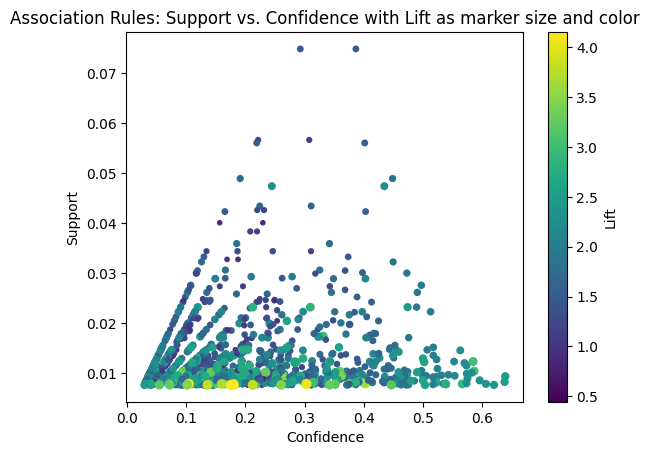

In [264]:
plt.scatter(assoc_rules['confidence'], assoc_rules['support'], s=np.array(assoc_rules['lift']) * 10, c=assoc_rules['lift'])

# Labels and titles
plt.xlabel('Confidence')
plt.ylabel('Support')
plt.title('Association Rules: Support vs. Confidence with Lift as marker size and color')

# Color legend
plt.colorbar().set_label('Lift')

# Show plot
plt.show()


***
#### **b) Among the rules that you found in Part (c), list the rules whose Confidence metrics are greater than or equal to 60%.  Please show the rules in a table that shows the Antecedent, the Consequent, the Support, the Confidence, the Expected Confidence, and the Lift.**



In [265]:
condition = assoc_rules['confidence'] >= 0.6
result_df = assoc_rules[condition]
result_df

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
726,"(butter, root vegetables)",(whole milk),0.012913,0.255516,0.008236,0.637795,2.496107,0.004936,2.055423
732,"(yogurt, butter)",(whole milk),0.014642,0.255516,0.009354,0.638889,2.500387,0.005613,2.061648
1200,"(yogurt, other vegetables, root vegetables)",(whole milk),0.012913,0.255516,0.007829,0.606299,2.372842,0.004530,1.890989
1214,"(yogurt, tropical fruit, other vegetables)",(whole milk),0.012303,0.255516,0.007626,0.619835,2.425816,0.004482,1.958317


***
<h2 style="font-size:40px;color:#2e75b5">Question 3 (40 points)</h2>

#### **This question demonstrates the effect of rescaling input variables on the cluster results.  We will discover clusters using all the observations in the TwoFeatures.csv file with the following specifications.**

* **The input interval variables are x1 and x2**
* **The metric is the Manhattan distance**
* **The minimum number of clusters is 1**
* **The maximum number of clusters is 8**
* **Use the Elbow value for choosing the optimal number of clusters**


#### **Since the sklearn.cluster.KMeans class works only with the Euclidean distance, you will need to develop custom Python codes to implement the K-Means algorithm with the Manhattan distance.**
***


#### **a) Plot x2 (vertical axis) versus x1 (horizontal axis).  Add gridlines to both axes.  Let the graph engine chooses the tick marks. How many clusters do you see in the graph?**

In [266]:
# Load the data
TwoFeaters_df = pd.read_csv('./data/TwoFeatures.csv')
TwoFeaters_df.head()


,x1,x2
0,2.08,-1491.6
1,-1.90,2543.6
2,-1.68,-2134.7
3,1.31,-2572.6
4,1.95,-2288.7


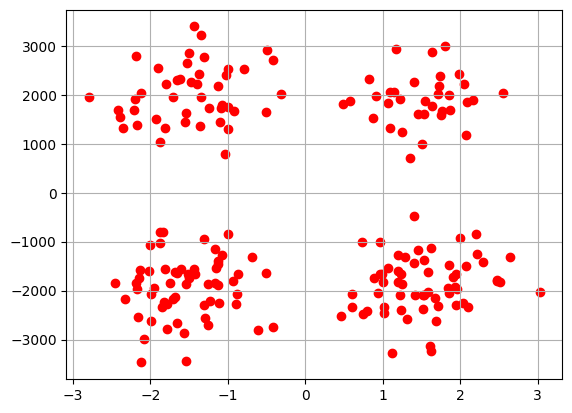

In [267]:
plt.scatter(TwoFeaters_df['x1'], TwoFeaters_df['x2'], c="red")
plt.grid(True)
plt.show()

### **I see <span style="color:red">4</span> clusters in the graph**

***
#### **b) Discover the optimal number of clusters without any transformations.  List the number of clusters, the Total Within-Cluster Sum of Squares (TWCSS), and the Elbow values in a table. Plot the Elbow Values versus the number of clusters.  How many clusters do you find? What are the centroids of your optimal clusters?**

In [268]:
def manhattan(a, b):
    return sum(abs(val1-val2) for val1, val2 in zip(a,b))

def manhattan_distance(x, y):
    return np.sum(np.abs(x - y))


In [269]:
def getPositionSRS (nObs, nCluster):

   centroid_pos = []

   kObs = 0
   iSample = 0
   for iObs in range(nObs):
      kObs = kObs + 1
      uThreshold = (nCluster - iSample) / (nObs - kObs + 1)
      if (random.random() < uThreshold):
         centroid_pos.append(iObs)
         iSample = iSample + 1

      if (iSample == nCluster):
         break

   return (centroid_pos)

def assignMember (trainData, centroid):
   pair_distance = metrics.pairwise_distances(trainData, centroid, metric='manhattan')
   member = pd.Series(np.argmin(pair_distance, axis = 1), name = 'Cluster')
   wc_distance = pd.Series(np.min(pair_distance, axis = 1), name = 'Distance')

   return (member, wc_distance)

def KMeansCluster (trainData, nCluster, nIteration = 500, nTrial = 10, randomSeed = None):
   n_obs = trainData.shape[0]

   if (randomSeed is not None):
      random.seed(a = randomSeed)

   list_centroid = []
   list_wcss = []
   for iTrial in range(nTrial):
      centroid_pos = getPositionSRS(n_obs, nCluster)
      centroid = trainData.iloc[centroid_pos]
      member_prev = pd.Series([-1] * n_obs, name = 'Cluster')

      for iter in range(nIteration):
         member, wc_distance = assignMember(trainData, centroid)

         centroid = trainData.join(member).groupby(by = ['Cluster']).mean()
         member_diff = np.sum(np.abs(member - member_prev))
         if (member_diff > 0):
            member_prev = member
         else:
            break

      list_centroid.append(centroid)
      list_wcss.append(np.sum(wc_distance))

   best_solution = np.argmin(list_wcss)
   centroid = list_centroid[best_solution]
   
   member, wc_distance = assignMember(trainData, centroid)
   
   return (member, centroid, wc_distance)


   N Cluster    Total WCSS         Elbow         slope  Acceleration
0        1.0  7.828910e+08  3.914455e+06  0.000000e+00  0.000000e+00
1        2.0  6.508965e+07  6.428011e+05 -3.271654e+06  0.000000e+00
2        3.0  3.933646e+07  5.611905e+05 -8.161057e+04  3.190043e+06
3        4.0  2.390495e+07  4.726863e+05 -8.850423e+04 -6.893657e+03
4        5.0  1.675310e+07  4.374850e+05 -3.520131e+04  5.330292e+04
5        6.0  1.292097e+07  4.002098e+05 -3.727515e+04 -2.073841e+03
6        7.0  9.013557e+06  3.760044e+05 -2.420544e+04  1.306970e+04
7        8.0  7.101907e+06  3.410905e+05 -3.491387e+04 -1.070842e+04


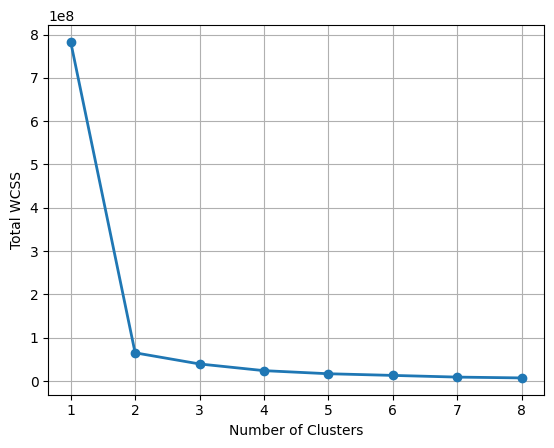

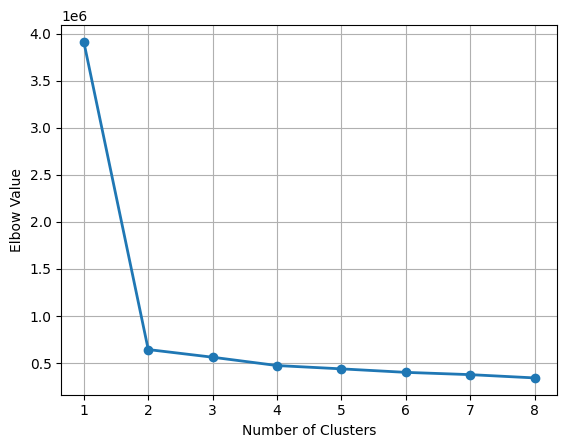

In [270]:
maxNClusters = 8
nCity = TwoFeaters_df.shape[0]

nClusters = np.zeros(maxNClusters)
Elbow = np.zeros(maxNClusters)
slope = np.zeros(maxNClusters)
accel = np.zeros(maxNClusters)
TotalWCSS = np.zeros(maxNClusters)

for c in range(maxNClusters):
   KClusters = c + 1
   nClusters[c] = KClusters

   member, centroid, wc_distance = KMeansCluster (TwoFeaters_df, KClusters,
                                                  nIteration = 500, nTrial = 10)

    



   WCSS = np.zeros(KClusters)
   nC = np.zeros(KClusters)

   for i in range(nCity):
      k = member.iloc[i]
      nC[k] += 1

      WCSS[k] += manhattan_distance(TwoFeaters_df.iloc[i], centroid.iloc[k])**2


   Elbow[c] = 0
   for k in range(KClusters):
      Elbow[c] += WCSS[k] / nC[k]
      TotalWCSS[c] += WCSS[k]


for i in range(len(Elbow)):
    if i == 0:
        pass
    else:
        slope[i] = Elbow[i]-Elbow[i-1]

for i in range(len(slope)):
    if i == 0 or i == 1:
        pass
    else:
        accel[i] = slope[i] - slope[i-1]
result_df = pd.DataFrame({'N Cluster': nClusters, 'Total WCSS': TotalWCSS,
                              'Elbow': Elbow, 'slope': slope ,'Acceleration': accel})

print(result_df)


plt.figure()
plt.plot(nClusters, TotalWCSS, linewidth = 2, marker = 'o')
plt.grid(True)
plt.xlabel("Number of Clusters")
plt.ylabel("Total WCSS")
plt.xticks(range(1, maxNClusters+1))
plt.show()


plt.figure()
plt.plot(nClusters, Elbow, linewidth = 2, marker = 'o')
plt.grid(True)
plt.xlabel("Number of Clusters")
plt.ylabel("Elbow Value")
plt.xticks(range(1, maxNClusters+1))
plt.show()





In [271]:
member, centroid, wc_distance = KMeansCluster (TwoFeaters_df, 2, nIteration = 500, nTrial = 10)

print('Using the elbow value, the optimal number of clusters is 2')
print(f'The centroids of the optimal number of clusters is: \n{centroid}')

Using the elbow value, the optimal number of clusters is 2
The centroids of the optimal number of clusters is: 
               x1           x2
Cluster                       
0        0.014711 -1905.196694
1       -0.194810  1967.883544


***
#### **c) Linearly rescale x1 such that the resulting variable has a minimum of zero and a maximum of ten.  Likewise, rescale x2.  Discover the optimal number of clusters from the transformed observations. List the number of clusters, the Total Within-Cluster Sum of Squares (TWCSS), and the Elbow values in a table. Plot the Elbow Values versus the number of clusters.  How many clusters do you find? What are the centroids of your optimal clusters in the original scale of x1 and x2?**

In [272]:
# TODO
def rescale_column(column):
    min_val = min(column)
    max_val = max(column)
    range = max_val - min_val
    return [(((x - min_val) * 10) / range) for x in column]

TwoFeaters_df['x1'] = rescale_column(TwoFeaters_df['x1'])
TwoFeaters_df['x2'] = rescale_column(TwoFeaters_df['x2'])


   N Cluster   Total WCSS      Elbow     slope  Acceleration
0        1.0  5929.373747  29.646869  0.000000      0.000000
1        2.0  2294.063534  22.743793 -6.903076      0.000000
2        3.0  1148.458960  15.972892 -6.770901      0.132175
3        4.0   472.769093   9.254667 -6.718225      0.052676
4        5.0   414.542488   9.702144  0.447476      7.165701
5        6.0   355.110138  10.066034  0.363890     -0.083586
6        7.0   307.287959  10.631243  0.565209      0.201319
7        8.0   284.459935  10.928477  0.297234     -0.267976


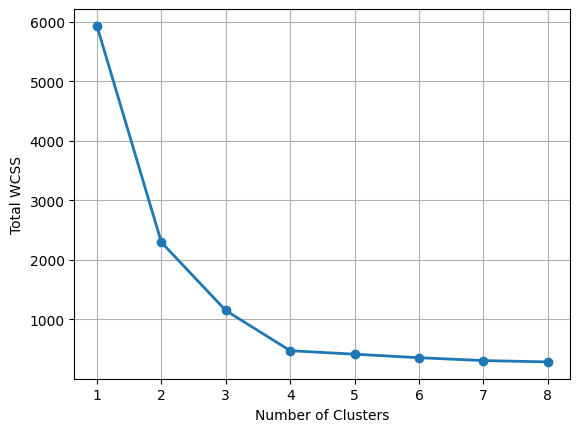

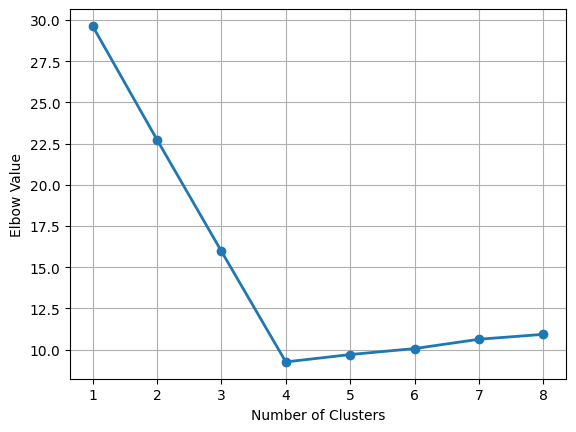

In [273]:
maxNClusters = 8
nCity = TwoFeaters_df.shape[0]

nClusters = np.zeros(maxNClusters)
Elbow = np.zeros(maxNClusters)
slope = np.zeros(maxNClusters)
accel = np.zeros(maxNClusters)
TotalWCSS = np.zeros(maxNClusters)

for c in range(maxNClusters):
   KClusters = c + 1
   nClusters[c] = KClusters

   member, centroid, wc_distance = KMeansCluster (TwoFeaters_df, KClusters,
                                                  nIteration = 500, nTrial = 20, randomSeed=20231225)

    



   WCSS = np.zeros(KClusters)
   nC = np.zeros(KClusters)

   for i in range(nCity):
      k = member.iloc[i]
      nC[k] += 1

      WCSS[k] += manhattan_distance(TwoFeaters_df.iloc[i], centroid.iloc[k])**2


   Elbow[c] = 0
   for k in range(KClusters):
      Elbow[c] += WCSS[k] / nC[k]
      TotalWCSS[c] += WCSS[k]


for i in range(len(Elbow)):
    if i == 0:
        pass
    else:
        slope[i] = Elbow[i]-Elbow[i-1]

for i in range(len(slope)):
    if i == 0 or i == 1:
        pass
    else:
        accel[i] = slope[i] - slope[i-1]
result_df = pd.DataFrame({'N Cluster': nClusters, 'Total WCSS': TotalWCSS,
                              'Elbow': Elbow, 'slope': slope ,'Acceleration': accel})

print(result_df)


plt.figure()
plt.plot(nClusters, TotalWCSS, linewidth = 2, marker = 'o')
plt.grid(True)
plt.xlabel("Number of Clusters")
plt.ylabel("Total WCSS")
plt.xticks(range(1, maxNClusters+1))
plt.show()


plt.figure()
plt.plot(nClusters, Elbow, linewidth = 2, marker = 'o')
plt.grid(True)
plt.xlabel("Number of Clusters")
plt.ylabel("Elbow Value")
plt.xticks(range(1, maxNClusters+1))
plt.show()


In [274]:
member, centroid, wc_distance = KMeansCluster (TwoFeaters_df, 4, nIteration = 500, nTrial = 10)

print('Using the elbow value, the optimal number of clusters is 4')
print(f'The centroids of the optimal number of clusters is: \n{centroid}')

Using the elbow value, the optimal number of clusters is 4
The centroids of the optimal number of clusters is: 
               x1        x2
Cluster                    
0        2.260023  7.994898
1        7.369618  7.826083
2        7.422117  2.313790
3        2.172680  2.237297


***
#### **d) If you are doing everything correctly, you should discover two different optimal cluster solutions.  In your words, how do you explain the difference?**

### **Answer:**
##### **The optimal # of cluster before rescaling was 2; however, after rescaling the optimal # of clusters became 4.**
##### **After rescaling the clustering findings are more informative and does not depend on the units since all variables are changed to have the same scale.**